<div align="center">
  <b> <font size="6">Simple Linear Regression without Sci-Kit Learn</font> </b>
</div>

In [1]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [2]:
# Load the dataset into pandas dataframe
df = pd.read_csv("E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\Advertising.csv")     
# Change this location based on the location of dataset in your machine

In [3]:
# Display the first five records
df.head()    

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Advertising data comprises four features: TV, radio, newspaper, and sales. It explains the budget (in 1000$) spent on different mass media and the net outcome for every week. 
<ul>
  <li>sales for a product (<b> output/dependent/target variable </b>).</li>
  <li>advertising budget for TV, radio, and newspaper media (<b> input/independent/target variable </b>).</li> 
</ul> 
Planning to perform regression on TV budget (X) as input and sales (Y) as output.

In [4]:
# Load TV into X and sales into Y variable
X = df.iloc[:,0].values                     # Budget spent on TV
Y = df.iloc[:,3].values                     # Sales

In [5]:
def disp_data(feature1,feature2):
    print('Displaying first 10 records')
    print('-------------------------')
    print('TV budget (X)','|','Sales (Y)')
    print('-------------------------')
    count = 0
    for x,y in zip(feature1,feature2):
        if count == 10:
            break
        else:
            print(x,'          ',y)
            count = count + 1
disp_data(X,Y)

Displaying first 10 records
-------------------------
TV budget (X) | Sales (Y)
-------------------------
230.1            22.1
44.5            10.4
17.2            9.3
151.5            18.5
180.8            12.9
8.7            7.2
57.5            11.8
120.2            13.2
8.6            4.8
199.8            10.6


<b>Row </b> <=> record, tuple, instance, sample, observation, object, case, entity <br>
<b>Column </b> <=> attribute, variable, field, feature, characteristic, dimension <br>
<b> input feature </b> <=> independent feature or predictor feature. Here, X1 (TV) is the input feature. <br>
<b> output feature </b>  <=> dependent feature or response feature or target feature. Here, Y (sales) is the output feature.

### Step 2: Split the data for training and testing

In [6]:
# Dataset shape (number of rows and columns)
df.shape

(200, 4)

In [7]:
# Splitting dataset into training set (80%) and testing set (20%)
x_train = X[0:160]   
x_test = X[160:]  
y_train = Y[0:160]   
y_test = Y[160:]  

In [8]:
print("Training data")
print("==========================")
disp_data(x_train,y_train)

Training data
Displaying first 10 records
-------------------------
TV budget (X) | Sales (Y)
-------------------------
230.1            22.1
44.5            10.4
17.2            9.3
151.5            18.5
180.8            12.9
8.7            7.2
57.5            11.8
120.2            13.2
8.6            4.8
199.8            10.6


In [9]:
print("Testing data")
print("==========================")
disp_data(x_test,y_test)

Testing data
Displaying first 10 records
-------------------------
TV budget (X) | Sales (Y)
-------------------------
172.5            14.4
85.7            13.3
188.4            14.9
163.5            18.0
117.2            11.9
234.5            11.9
17.9            8.0
206.8            12.2
215.4            17.1
284.3            15.0


### Step 3: Training phase (bulding a model)

##### Variance function

In [10]:
def variance(values, mean):
    var = 0
    for val in values:
        var = var + (val-mean)**2 
    return var

##### Co-variance function

In [11]:
def covariance(X_val, X_val_mean, Y_val , Y_val_mean):
    covariance = 0
    for r in range(len(X_val)):
        covariance = covariance + (X_val[r] - X_val_mean) * (Y_val[r] - Y_val_mean)
    return covariance

##### The linear model Y = m X + b 

In [12]:
x_train_mean = np.mean(x_train)
y_train_mean = np.mean(y_train)
x_train_var = variance(x_train,x_train_mean)
x_train_y_test_cov = covariance(x_train, x_train_mean, y_train, y_train_mean)

\begin{equation}
m = \frac{\sum_{i=1}^{n}(x_{i}-\bar x)(y_{i}-\bar y)}{\sum_{i=1}^{n}(x_{i}-\bar x)^{2}}  
\end{equation}

In [13]:
m = x_train_y_test_cov / x_train_var
b = y_train_mean - m * x_train_mean

In [14]:
print('Y = ',round(m,3),'X + ',round(b,3))

Y =  0.049 X +  7.069


##### Predicting value for training set using the model above

In [15]:
# Predicting the Training set results
y_train_pred = np.zeros(len(x_train)).reshape(len(x_train),1)
for x in range(len(x_train)):
    y_train_pred[x] = m * x_train[x] + b 

##### Visualizing the model

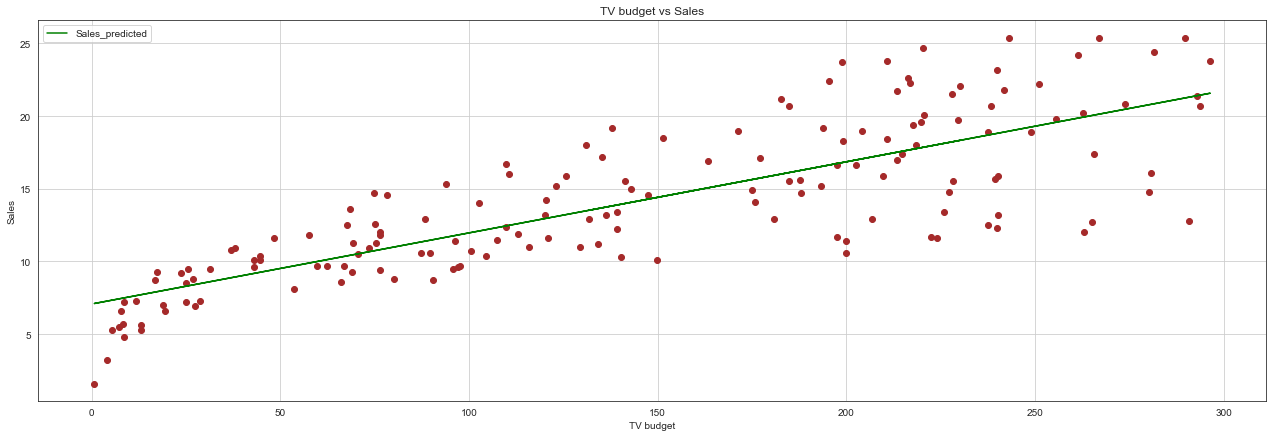

In [16]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_train,y_train,color="brown")
plt.grid(b=None) 
plt.plot(x_train,y_train_pred,"g",label="Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for training set

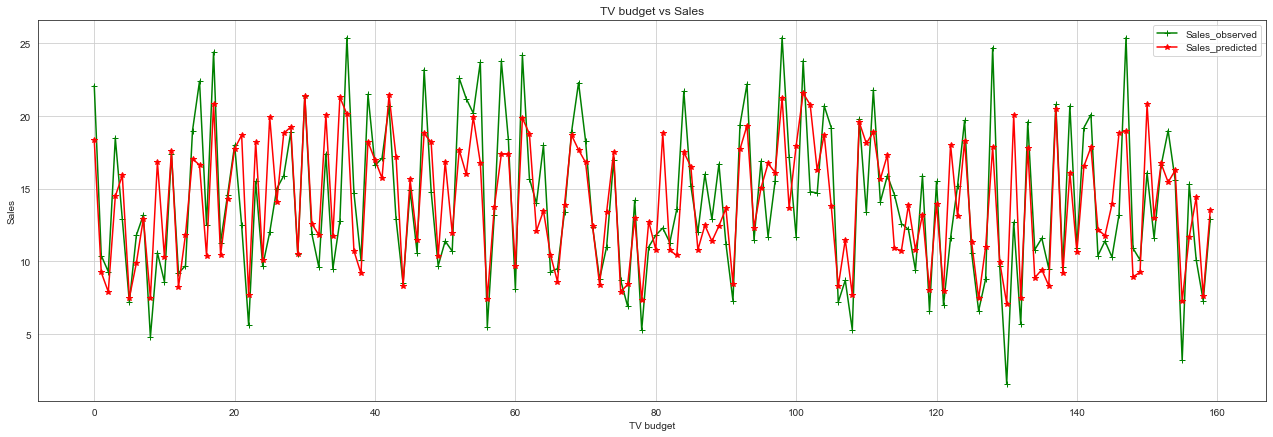

In [17]:
# Predicting the Test set results
x = np.arange(len(y_train_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_train,"g-+",label="Sales_observed")
plt.plot(x,y_train_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

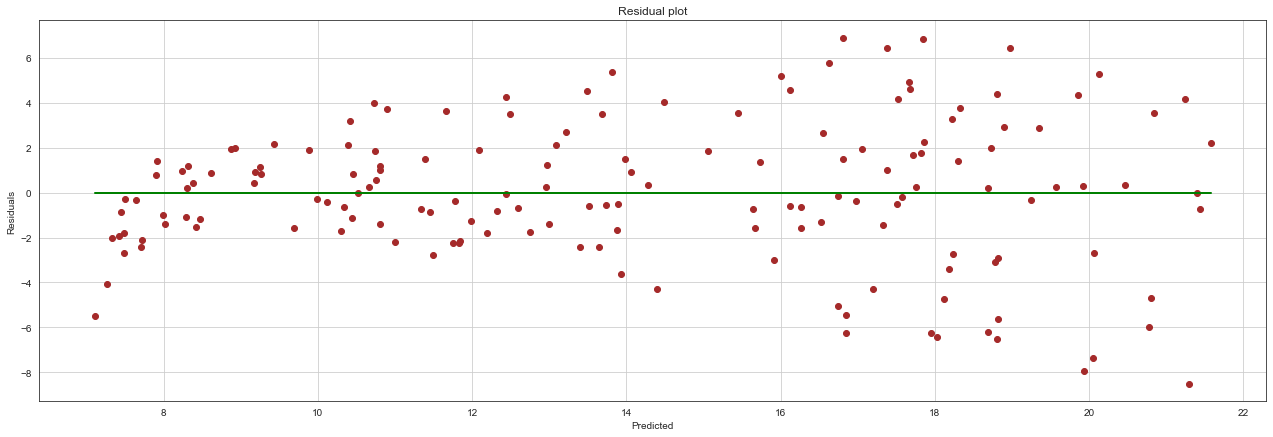

In [18]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_train.reshape((-1, 1))-y_train_pred
zeros = y_train-y_train
plt.scatter(y_train_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_train_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

### Different error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [19]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : [1551.95]


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [20]:
Train_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : [9.7]


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [21]:
Train_RMSE = np.round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : [3.11]


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [22]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  sum = sum + np.abs(diff)   
Train_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : [2.43]


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [23]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = (y_train[i] - y_train_pred[i])/y_train[i]
  sum = sum + np.abs(diff)  
Train_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : [20.43]


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [24]:
# SSE variance for mean model
y_train_mean = np.mean(y_train)
SSE_mean = variance(y_train,y_train_mean) 
# SSE variance for fit model
y_train_pred_mean = np.mean(y_train_pred)
SSE_fit = variance(y_train_pred,y_train_pred_mean) 
# calculating R_square
R = 1 - (SSE_fit/SSE_mean)
Train_RS = np.round(R,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : [36.] %


### Step 6: Testing phase

##### Predicting value for training set using the model above

In [25]:
# Predicting values for test input set
y_test_pred = np.zeros(len(x_test)).reshape(len(x_test),1)
for x in range(len(x_test)):
    y_test_pred[x] = m * x_test[x] + b 

##### Visualizing the model

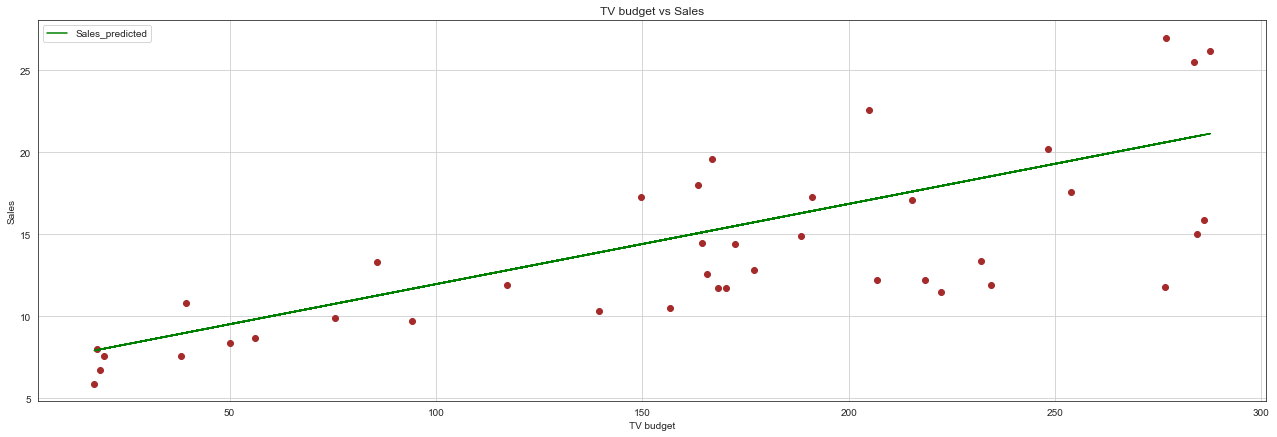

In [26]:
# Plotting the predicted values
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_test,y_test,color="brown")
plt.grid(b=None) 
plt.plot(x_test,y_test_pred,"g",label="Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for training set

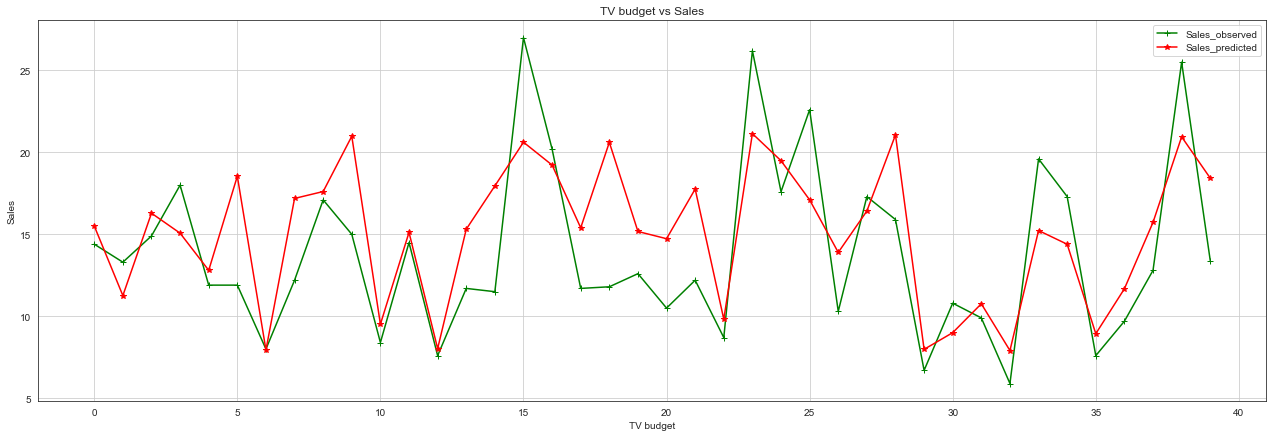

In [27]:
x = np.arange(len(y_test_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_test,"g-+",label="Sales_observed")
plt.plot(x,y_test_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

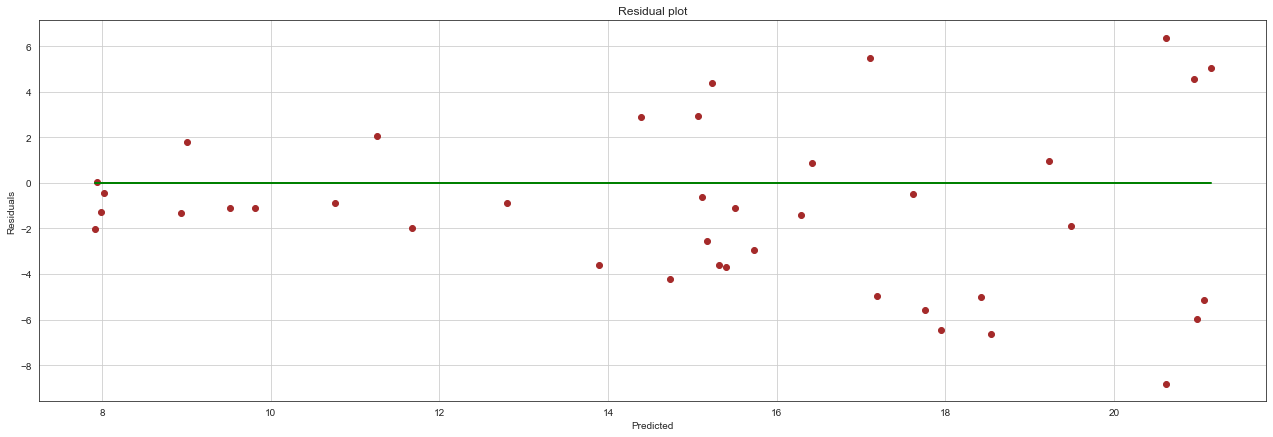

In [28]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_test.reshape((-1, 1))-y_test_pred
zeros = y_test-y_test 
plt.scatter(y_test_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_test_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

### Different error calculations to asses the model for the test set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [29]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : [565.15]


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [30]:
Test_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : [38.8]


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [31]:
Test_RMSE = np.round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : [6.23]


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [32]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  sum = sum + np.abs(diff)   
Test_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : [3.08]


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [33]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = (y_test[i] - y_test_pred[i])/y_test[i]
  sum = sum + np.abs(diff)   
Test_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : [23.03]


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [34]:
# SSE variance for mean model
y_test_mean = np.mean(y_test)
SSE_mean = variance(y_test,y_test_mean) 
# SSE variance for fit model
y_test_pred_mean = np.mean(y_test_pred)
SSE_fit = variance(y_test_pred,y_test_pred_mean) 
# calculating R_square
R = 1 - (SSE_fit/SSE_mean)
Test_RS = np.round(R,2)*100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%") 

R-Squred value (goodness of model) for testing set : [36.] %


### Underfitting and overfitting observation

In [35]:
print("Error \t Train     \t Test")
print("================================")
print("SSE   \t",Train_SSE,"\t", Test_SSE)
print("MSE   \t",Train_MSE,"\t\t", Test_MSE)
print("RMSE   \t",Train_RMSE,"\t", Test_RMSE)
print("MAE   \t",Train_MAE,"\t", Test_MAE) 
print("RS   \t",Train_RS,"\t\t", Test_RS) 

Error 	 Train     	 Test
SSE   	 [1551.95] 	 [565.15]
MSE   	 [9.7] 		 [38.8]
RMSE   	 [3.11] 	 [6.23]
MAE   	 [2.43] 	 [3.08]
RS   	 [36.] 		 [36.]


#### Repeat this process by changing the values of parameters m and b until you get least SSE

#### Painful process, so we use Sci-Kit (SK) Learn library.